In [1]:
import cartopy as cp
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
# import data
infile = '../../kuroshio_productivity/data/jma_nitrate.csv'
data = pd.read_csv(infile, sep=',')

data.columns

subset = data[(data.nitrate>=0) & (data.depth<10)]


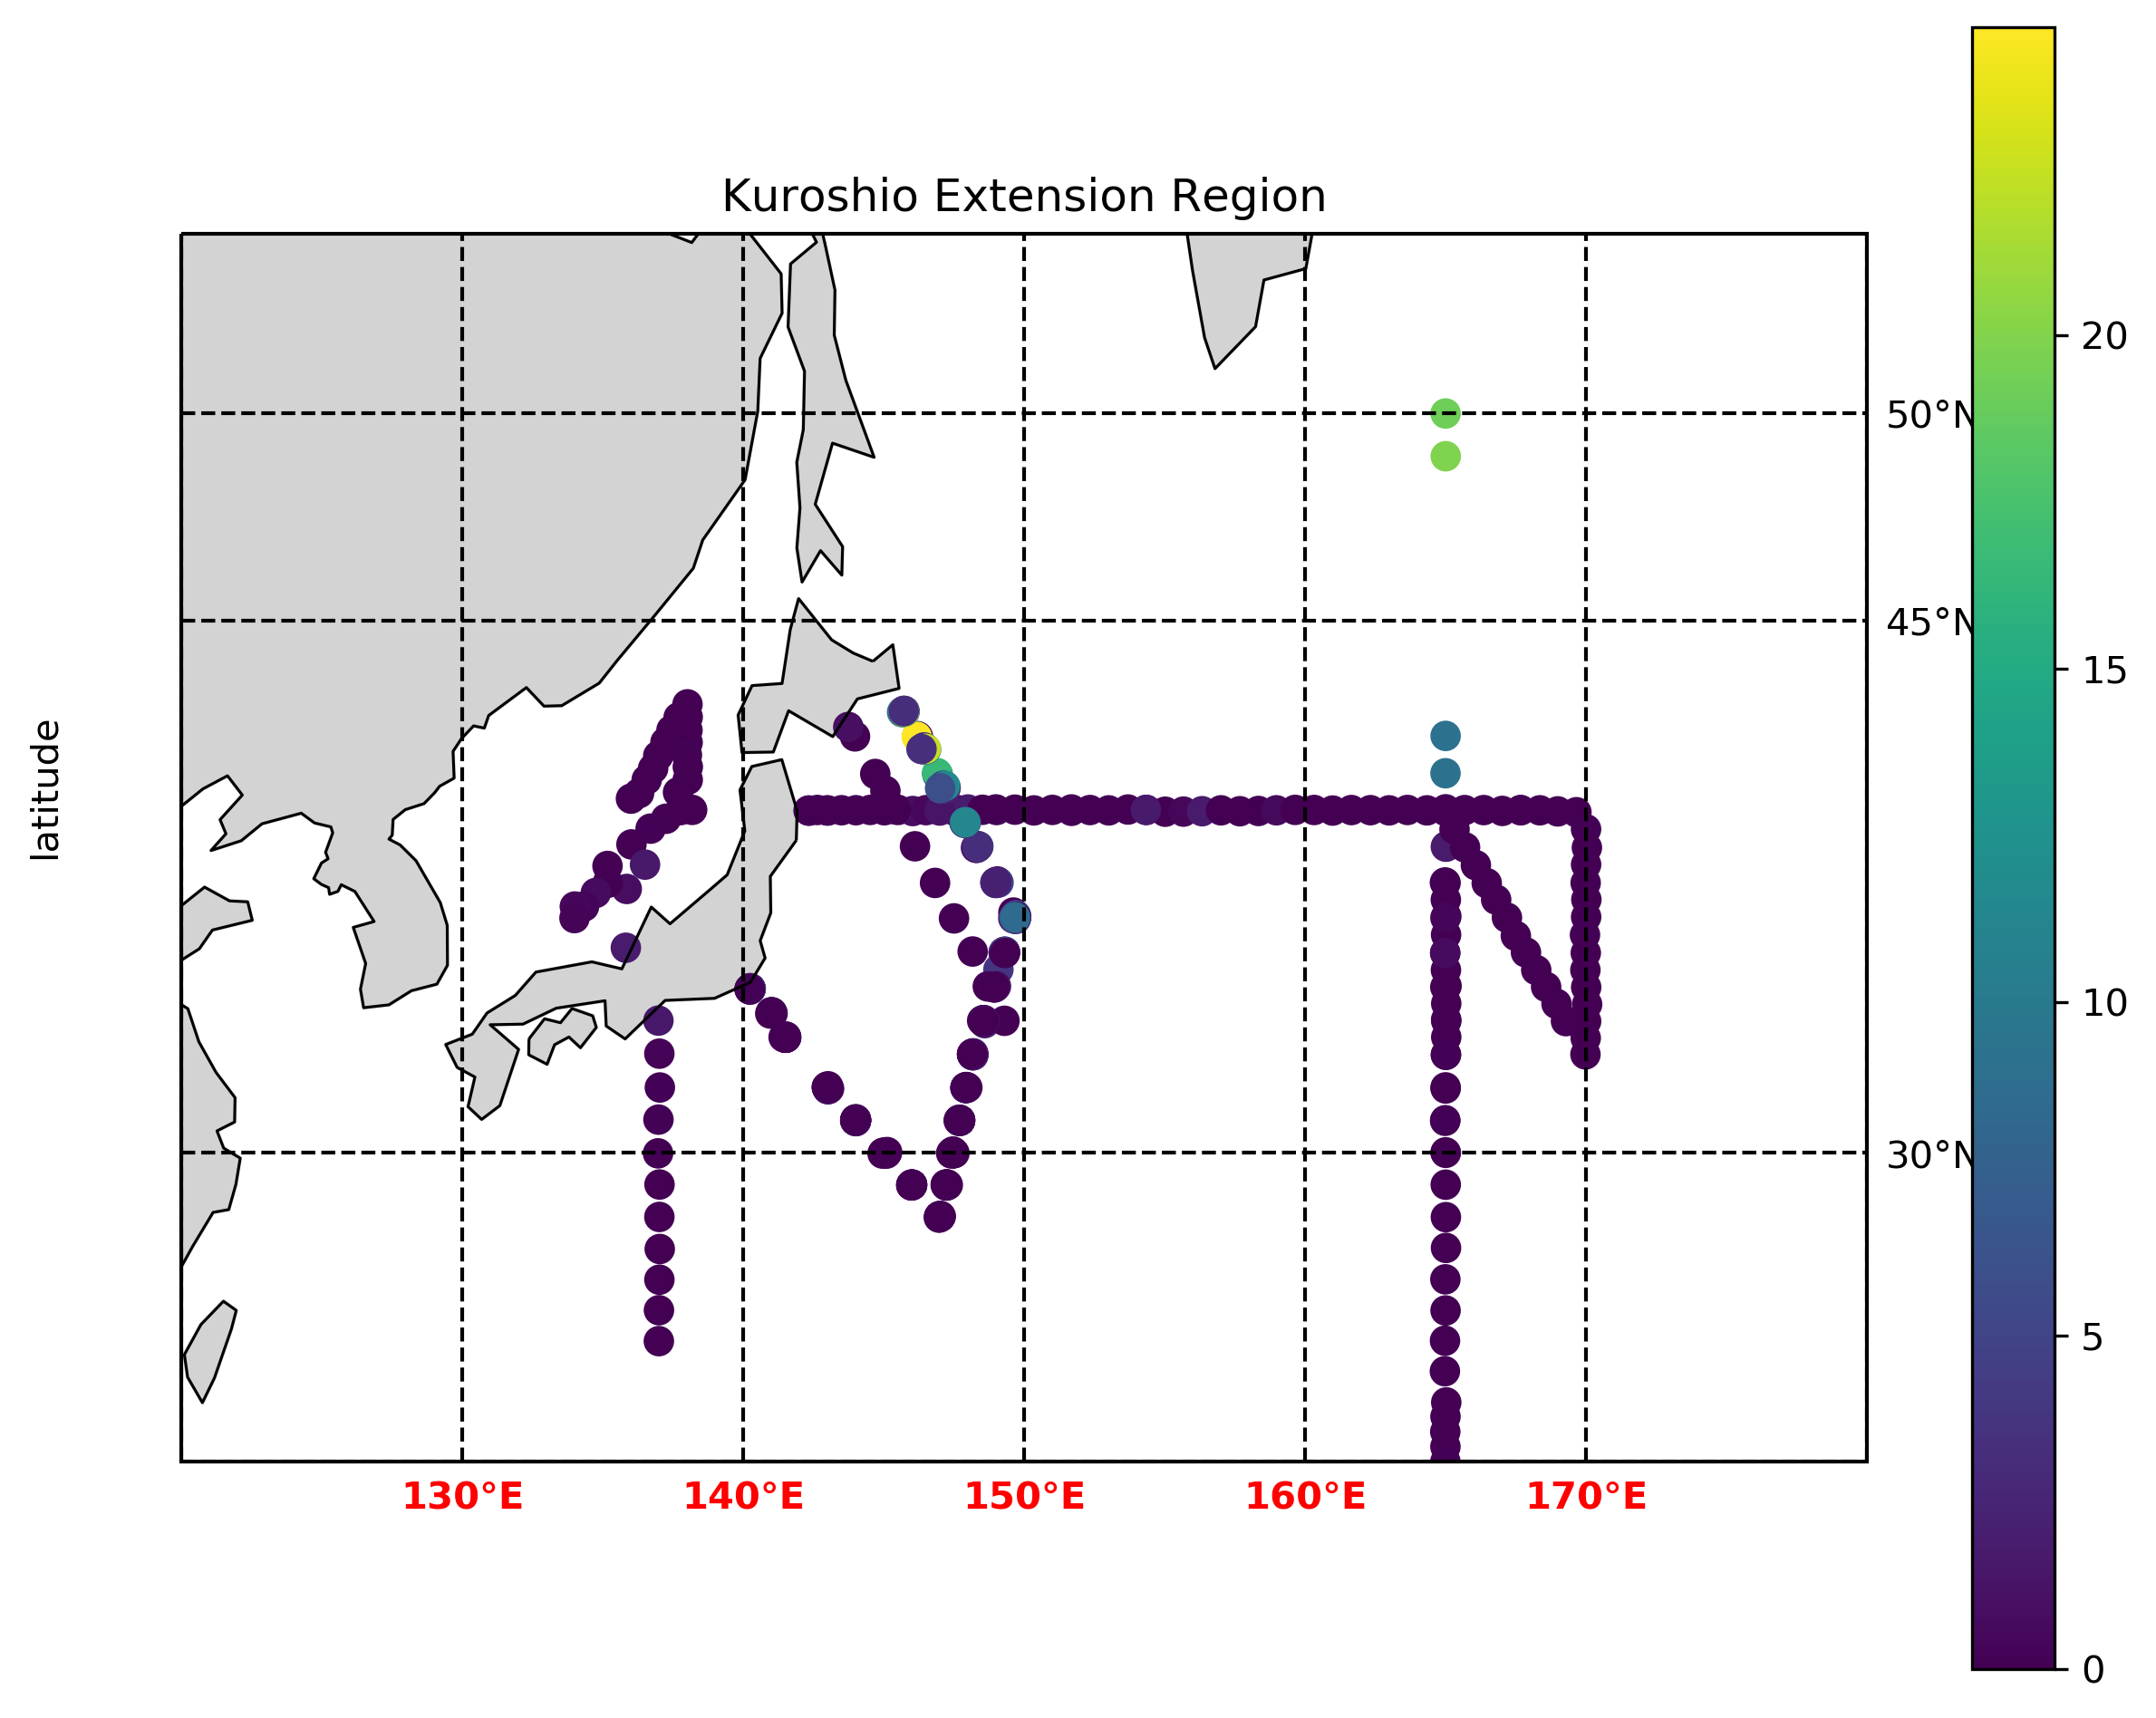

In [10]:
# create a regional map with parallels and meridians

fig = plt.figure(figsize = (10,8), dpi = 300)


ax = fig.add_subplot(1,1,1, projection = ccrs.Mercator(central_longitude = 0.0, min_latitude = 20.0, max_latitude = 55.0))

# ax.set_extent(east, west, south, north)
ax.set_extent([120.0, 180.0, 20.0, 50.0])

ax.coastlines(linewidth=0.75, color='black')

ax.set_title('Kuroshio Extension Region')#, color = 'red', weight = 'bold')


# how to add lines of latitude and longitude
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k',linestyle='--')

gl.xlabels_top = False
gl.ylabels_left = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])

gl.ylocator = mticker.FixedLocator([20, 30, 45, 50, 55])

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey')

# if you want to add text axes labels
ax.text(-0.07, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

nn = ax.scatter(subset.lon, subset.lat,s=50, c= subset.nitrate,
           transform=ccrs.PlateCarree())

plt.colorbar(nn)

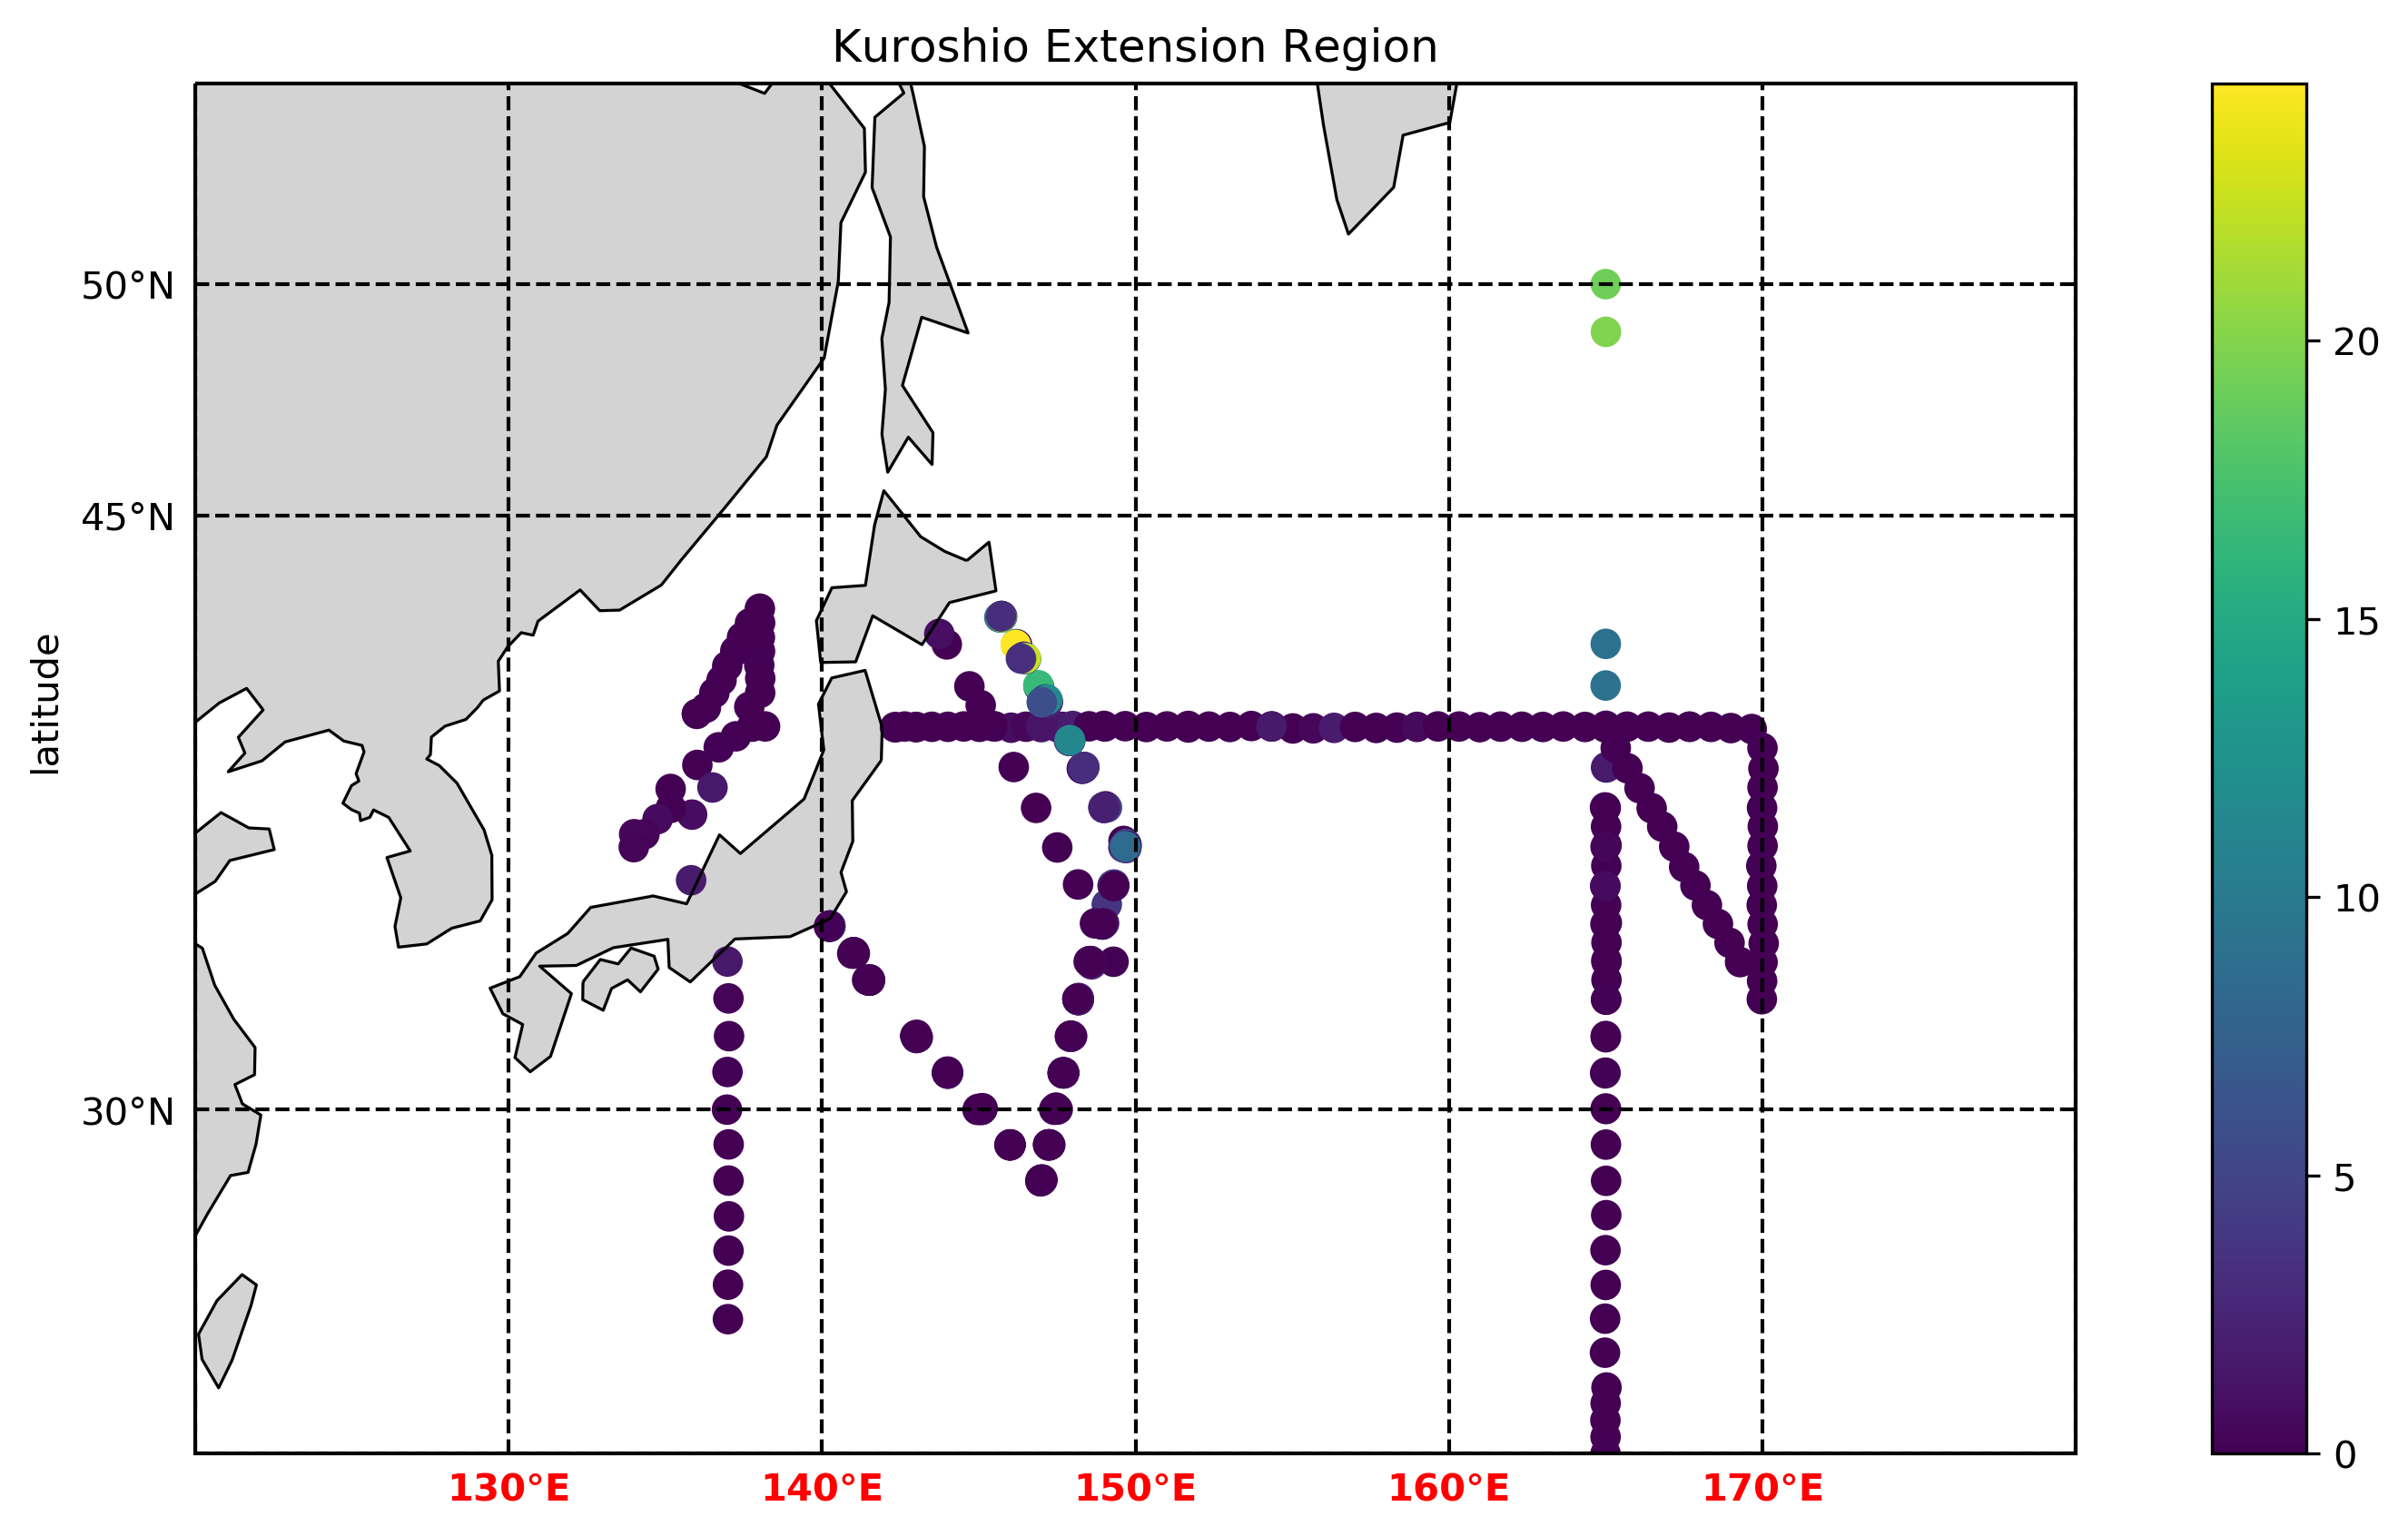

In [18]:
# create a regional map with parallels and meridians

fig = plt.figure(figsize = (10,8), dpi = 300)


ax = fig.add_subplot(1,1,1, projection = ccrs.Mercator(central_longitude = 0.0, min_latitude = 20.0, max_latitude = 55.0))

# ax.set_extent(east, west, south, north)
ax.set_extent([120.0, 180.0, 20.0, 50.0])

ax.coastlines(linewidth=0.75, color='black')

ax.set_title('Kuroshio Extension Region')#, color = 'red', weight = 'bold')


# how to add lines of latitude and longitude
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k',linestyle='--')

gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# gl.xlines = True
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])

gl.ylocator = mticker.FixedLocator([20, 30, 45, 50, 55])

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey')

# if you want to add text axes labels
ax.text(-0.07, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

nn = ax.scatter(subset.lon, subset.lat,s=50, c= subset.nitrate,
           transform=ccrs.PlateCarree())

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.5, axes_class=plt.Axes)


fig.add_axes(ax_cb)
plt.colorbar(nn, cax=ax_cb)